In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.neighbors import KNeighborsClassifier
import os
%matplotlib inline

### Team: - Static Startup
* Justin Mello, Raul Sanchez, Nate Bael, Melissa Graham

In [22]:
#This sets the Nba Team CSV to view teams current points and averages.

In [23]:
df_percentages = pd.read_csv('Nba_Team_Percentages.csv')
df_advanced = pd.read_csv('Advanced_Stats.csv')
df_score = pd.read_csv('box_score.csv')

In [24]:
df_percentages

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Milwaukee Bucks*,72,240.7,44.7,91.8,0.487,14.4,37.1,0.389,...,0.760,10.3,37.8,48.1,25.5,8.1,4.6,13.8,17.3,120.1
1,2,Brooklyn Nets*,72,241.7,43.1,87.3,0.494,14.2,36.1,0.392,...,0.804,8.9,35.5,44.4,26.8,6.7,5.3,13.5,19.0,118.6
2,3,Washington Wizards*,72,241.7,43.2,90.9,0.475,10.2,29.0,0.351,...,0.769,9.7,35.5,45.2,25.5,7.3,4.1,14.4,21.6,116.6
3,4,Utah Jazz*,72,241.0,41.3,88.1,0.468,16.7,43.0,0.389,...,0.799,10.6,37.6,48.3,23.7,6.6,5.2,14.2,18.5,116.4
4,5,Portland Trail Blazers*,72,240.3,41.3,91.1,0.453,15.7,40.8,0.385,...,0.823,10.6,33.9,44.5,21.3,6.9,5.0,11.1,18.9,116.1
5,6,Indiana Pacers,72,242.4,43.3,91.2,0.474,12.3,34.0,0.364,...,0.792,9.0,33.7,42.7,27.4,8.5,6.4,13.5,20.2,115.3
6,7,Phoenix Suns*,72,242.8,43.3,88.3,0.490,13.1,34.6,0.378,...,0.834,8.8,34.2,42.9,26.9,7.2,4.3,12.5,19.1,115.3
7,8,Denver Nuggets*,72,242.8,43.3,89.2,0.485,12.9,34.2,0.377,...,0.803,10.5,33.9,44.4,26.8,8.1,4.5,13.5,19.1,115.1
8,9,New Orleans Pelicans,72,242.1,42.5,89.1,0.477,10.6,30.4,0.348,...,0.729,11.7,35.7,47.4,26.0,7.6,4.4,14.6,18.0,114.6
9,10,Los Angeles Clippers*,72,240.0,41.8,86.7,0.482,14.3,34.7,0.411,...,0.839,9.4,34.7,44.2,24.4,7.1,4.1,13.2,19.2,114.0


In [25]:
df_advanced

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,Offense Four Factors FT/FGA,2,Defense Four Factors eFG%,Defense Four Factors TOV%,Defense Four Factors DRB%,Defense Four Factors FT/FGA,3,Arena,Attend.,Attend./G
0,1,Utah Jazz*,28.5,52,20,55,17,9.25,-0.29,8.97,...,.195,NaN,.507,10.3,79.3,.159,NaN,Vivint Smart Home Arena,"151,300","4,203"
1,2,Los Angeles Clippers*,28.8,47,25,49,23,6.18,-0.16,6.02,...,.186,NaN,.531,11.9,79.1,.186,NaN,STAPLES Center,"13,901",386
2,3,Phoenix Suns*,26.6,51,21,49,23,5.82,-0.15,5.67,...,.177,NaN,.534,12.4,78.5,.194,NaN,Phoenix Suns Arena,"104,027","2,890"
3,4,Milwaukee Bucks*,28.1,46,26,48,24,5.89,-0.32,5.57,...,.177,NaN,.536,11.5,79.7,.157,NaN,Fiserv Forum,"64,780","1,799"
4,5,Philadelphia 76ers*,27.1,49,23,48,24,5.58,-0.31,5.28,...,.225,NaN,.521,13.8,78.2,.200,NaN,Wells Fargo Center,"68,583","1,905"
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Offense Four Factors,NaN,Defense Four Factors,Defense Four Factors,Defense Four Factors,Defense Four Factors,NaN,NaN,NaN,NaN
6,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,FT/FGA,NaN,eFG%,TOV%,DRB%,FT/FGA,NaN,Arena,Attend.,Attend./G
7,6,Denver Nuggets*,26.1,47,25,47,25,4.93,-0.11,4.82,...,.176,NaN,.545,12.9,78.9,.200,NaN,Ball Arena,"54,563","1,516"
8,7,Brooklyn Nets*,28.2,48,24,46,26,4.50,-0.27,4.24,...,.208,NaN,.531,11.1,77.3,.187,NaN,Barclays Center,"30,491",847
9,8,Los Angeles Lakers*,28.2,42,30,42,30,2.79,-0.03,2.77,...,.200,NaN,.526,13.7,79.7,.184,NaN,STAPLES Center,"23,313",648


* We now will check if there will be any Nulls that will account into our Data.

In [26]:
df_percentages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      30 non-null     int64  
 1   Team    30 non-null     object 
 2   G       30 non-null     int64  
 3   MP      30 non-null     float64
 4   FG      30 non-null     float64
 5   FGA     30 non-null     float64
 6   FG%     30 non-null     float64
 7   3P      30 non-null     float64
 8   3PA     30 non-null     float64
 9   3P%     30 non-null     float64
 10  2P      30 non-null     float64
 11  2PA     30 non-null     float64
 12  2P%     30 non-null     float64
 13  FT      30 non-null     float64
 14  FTA     30 non-null     float64
 15  FT%     30 non-null     float64
 16  ORB     30 non-null     float64
 17  DRB     30 non-null     float64
 18  TRB     30 non-null     float64
 19  AST     30 non-null     float64
 20  STL     30 non-null     float64
 21  BLK     30 non-null     float64
 22  TOV 

In [27]:
#There does not seem to be any nulls in our data set, so our data will be easier to manage.

# Datatypes:

* object (1)
* int64 (2)
* Floats (22)

* Adding a quick summary for the dataset for values!

In [28]:
df_percentages.describe()

,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,72.0,241.420000,41.220000,88.416667,0.466067,12.706667,34.636667,0.366033,28.526667,...,0.778667,9.826667,34.470000,44.300000,24.806667,7.576667,4.880000,13.826667,19.283333,112.086667
std,8.803408,0.0,0.859992,1.702412,1.970486,0.015715,1.694399,3.782125,0.018481,2.237907,...,0.029912,0.856188,1.396585,1.777639,1.835650,0.744952,0.585102,1.165875,1.154626,4.140692
min,1.000000,72.0,240.000000,38.300000,83.700000,0.429000,9.900000,28.400000,0.336000,24.500000,...,0.725000,8.000000,32.000000,41.400000,21.300000,6.300000,4.000000,11.100000,17.200000,103.800000
25%,8.250000,72.0,240.700000,39.750000,87.225000,0.453500,11.375000,31.500000,0.351000,26.950000,...,0.760250,9.325000,33.525000,42.925000,23.700000,7.000000,4.400000,13.200000,18.550000,109.500000
50%,15.500000,72.0,241.550000,41.300000,88.400000,0.468000,12.750000,34.400000,0.366000,28.150000,...,0.776500,9.700000,34.600000,44.250000,24.550000,7.550000,4.900000,13.950000,19.100000,112.950000
75%,22.750000,72.0,242.100000,42.575000,89.200000,0.476000,13.800000,37.075000,0.376750,30.300000,...,0.797250,10.500000,35.300000,45.175000,26.675000,8.050000,5.200000,14.675000,20.200000,114.975000
max,30.000000,72.0,242.800000,44.700000,91.800000,0.494000,16.700000,43.000000,0.411000,33.000000,...,0.839000,11.700000,37.800000,48.300000,27.700000,9.100000,6.400000,16.100000,21.600000,120.100000


### Data Types
* Rk - Rank
* G - Games
* MP - Minutes Played
* FG - Field Goals
* FGA = Field Goal Average
* 3P - Three Pointers
* 3PA - 3 Point Average
* 2P - Two Pointers
* 2PA - 2 Point Average
* ORB - Offensive Rebounds
* DRB - Defensive Rebounds
* Blk - Blocks 
* Pts - Points

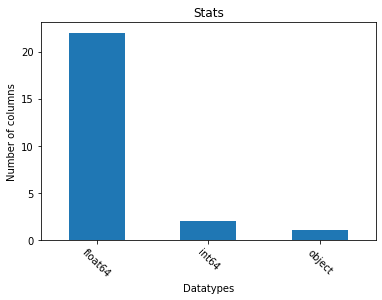

In [29]:
## Misc stats dataset
games_barplot = df_percentages.dtypes.value_counts().plot.bar()
plt.title("Stats")
plt.xlabel("Datatypes")
plt.ylabel("Number of columns")
plt.xticks(rotation=-45)
plt.show(games_barplot)

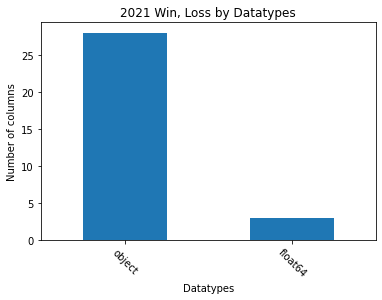

In [30]:
# Plot of Wins and Losses for the League
games1_barplot = df_advanced.dtypes.value_counts().plot.bar()
plt.title("2021 Win, Loss by Datatypes")
plt.xlabel("Datatypes")
plt.ylabel("Number of columns")
plt.xticks(rotation=-45)
plt.show(games1_barplot)

## Here the pairlot reveals the direct relation between a teams offensive rating and their wins and loses.

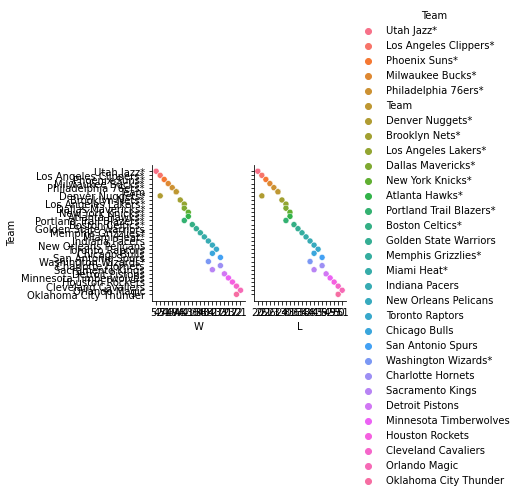

In [31]:
sns.pairplot(df_advanced,
             x_vars=['W','L'], 
             y_vars=['Team'],
             hue='Team')

<AxesSubplot:xlabel='W', ylabel='Team'>

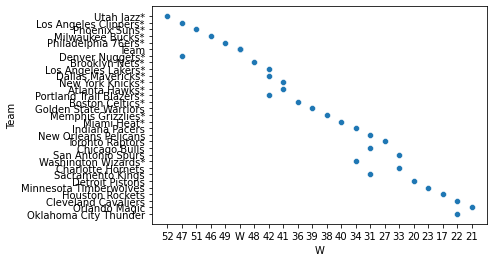

In [32]:
# Scatterplot to display the teams and their wins achieved during 2020-2021 season
sns.scatterplot(data=df_advanced,x='W',y='Team')

<AxesSubplot:xlabel='L', ylabel='Team'>

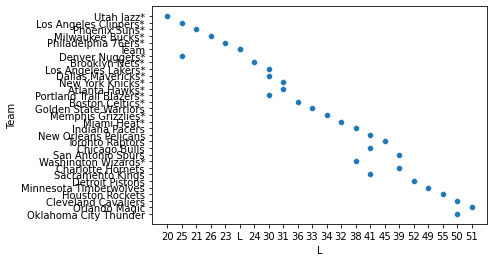

In [33]:
# Scatterplot to display the teams and their losses during 2020-2021 season to give a sense of which team
sns.scatterplot(data=df_advanced,x='L',y='Team')

* When we combine both scatterplots, we can visually see where team wins and loses overlap. This can be interpreted as the teams that were evenly split between wins and losses, i.e. .500 teams.

<AxesSubplot:xlabel='W', ylabel='Team'>

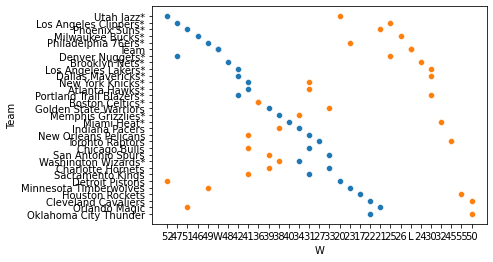

In [34]:
# Represented by the orange scatter dots
sns.scatterplot(data=df_advanced,x='W',y='Team')
# Represented by the blue scatter dots
sns.scatterplot(data=df_advanced,x='L',y='Team')

### Using Logistic Regression to find team win:
* Using the "score" csv, we will be able to see which teams will be able to win depending on schedule. 

In [35]:
df_score

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,teamFTF,opptFTF,outcome
0,10/25/2016,8:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,NY,...,28.8922,0.4592,20.8951,2.0667,80.0000,100.3729,100.3729,0.229885,0.202128,0
1,10/25/2016,8:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,CLE,...,-28.8922,0.3478,12.9969,0.9444,33.3333,100.3729,99.9564,0.202128,0.229885,1
2,10/25/2016,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,UTA,...,9.7257,0.4699,18.3824,1.6923,38.4615,92.5380,92.1540,0.195122,0.293333,0
3,10/25/2016,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,POR,...,-9.7257,0.4444,15.5687,1.3571,64.2857,92.5380,92.9252,0.293333,0.195122,1
4,10/25/2016,10:30,Regular,Maddox,Tre,Fraher,Pat,Crawford,Dan,SA,...,-29.3592,0.4301,18.0560,1.5000,68.7500,98.7765,98.7765,0.265306,0.211765,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,4/12/2017,10:30,Regular,Williams,James,Garretson,Ron,Ayotte,Mark,GS,...,-14.4699,0.4100,16.4098,1.2778,72.2222,103.6636,104.0973,0.244444,0.150538,1
2456,4/12/2017,10:30,Regular,Lane,Karl,Wall,Scott,Spooner,Bill,SAC,...,22.5680,0.5513,22.4806,4.8333,66.6667,88.6210,88.6210,0.172840,0.301205,0
2457,4/12/2017,10:30,Regular,Lane,Karl,Wall,Scott,Spooner,Bill,LAC,...,-22.5680,0.4706,21.5724,2.4545,18.1818,88.6210,88.2533,0.301205,0.172840,1
2458,4/12/2017,10:30,Regular,Guthrie,David,Adams,Bennie,Davis,Marc,NO,...,-3.0275,0.4271,15.9744,0.8800,16.0000,99.0917,98.6805,0.233333,0.152941,1


In [36]:
df1 = df_score[['teamEFG%','opptEFG%', 'teamTO%', 'opptTO%', 'teamOREB%', 'teamDREB%', 'teamFTF', 'opptFTF', 'outcome']]
df1.head()

,teamEFG%,opptEFG%,teamTO%,opptTO%,teamOREB%,teamDREB%,teamFTF,opptFTF,outcome
0,0.4195,0.5479,15.8172,12.7812,24.5283,72.5000,0.229885,0.202128,0
1,0.5479,0.4195,12.7812,15.8172,27.5000,75.4717,0.202128,0.229885,1
2,0.5366,0.6067,13.5870,13.3088,17.1429,83.3333,0.195122,0.293333,0
3,0.6067,0.5366,13.3088,13.5870,16.6667,82.8571,0.293333,0.195122,1
4,0.5408,0.5118,11.3415,14.6897,43.7500,80.9524,0.265306,0.211765,1


###  We will now Assign X (data) and y (target)

In [37]:
X = df1.drop("outcome", axis=1)
y = df1["outcome"]
print(X.shape, y.shape)

(2460, 8) (2460,)


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [54]:
# create a logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

classifier = make_pipeline(StandardScaler(), LogisticRegression())
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [55]:
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 1 0 1 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 1, 0, 1, 1]


In [51]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
610,1,1
611,1,1
612,1,1
613,1,1


### Analysis:
* From This Analysis we can match the ID, into the prediction and actual set. We Predict first, initializing a 1, while the "Actual" column will show the real score for the game showing that our predictions are matched depending on score and percentages.


### Using KNN:
* We use this model to predict a finer and closer representation of our numbers that we use for scores. The closer the numbers become, the most odds the team has to win

In [57]:
target = df1["outcome"]
target_names = ["loss", "win"]

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, target, random_state=42)

k: 1, Predict/Actual: 1.000/0.587
k: 3, Predict/Actual: 0.823/0.590
k: 5, Predict/Actual: 0.779/0.598
k: 7, Predict/Actual: 0.758/0.621
k: 9, Predict/Actual: 0.747/0.616
k: 11, Predict/Actual: 0.729/0.605
k: 13, Predict/Actual: 0.716/0.580
k: 15, Predict/Actual: 0.711/0.597
k: 17, Predict/Actual: 0.706/0.585
k: 19, Predict/Actual: 0.704/0.587


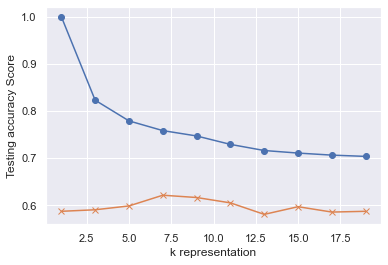

In [62]:
# Loop through different k values to see which has the highest accuracy

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Predict/Actual: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k representation")
plt.ylabel("Testing accuracy Score")
plt.show()

### Conclusions:
* 